In [1]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import time
import h5py
import kerastuner as kt

Using TensorFlow backend.


In [2]:
def processing_data(N_channels, file_path):
    df = pd.read_csv(file_path)
    # dataset
    dataset = df.values
    # input power and channels statuses
    X = dataset[:,0:N_channels+1]
    # channel SNRs
    Y = dataset[:,N_channels+1:2*N_channels+1]
    # shuffle necessary because while shuffle=True in .fit() shuffles the data, it splits into different datasets first
    X, Y = shuffle(X, Y)
    # scaling between 0 and 1
    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    Y = min_max_scaler.fit_transform(Y)
    return X, Y
# X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)
# X_train, X_val, Y_train, Y_val = train_test_split(X_scale, Y_scale, test_size=0.2)
N_channels = 40
file_path = '/Users/jackkelly/Desktop/Building_Model/Data/40_channels_data_blocks_20000.csv'
X_scale, Y_scale = processing_data(N_channels, file_path)

In [3]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=N_channels+1))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(keras.layers.Dense(hp.Int(f'hidden_{i}_units', min_value=32, max_value=320, step=1)))
    model.add(keras.layers.Dense(N_channels, activation='sigmoid'))
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.MeanSquaredError(), metrics=['mean_squared_error'])

    return model

In [4]:
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective('mean_squared_error', 'min'),
                     max_epochs=20,
                     factor=3,
                     directory='/Users/jackkelly/Desktop/Building_Model/',
                     project_name='intro_to_kt_layers',
                     overwrite=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [5]:
tuner.search(X_scale, Y_scale, epochs=50, validation_split=0.25, callbacks=[stop_early], verbose=2)

Train on 15000 samples, validate on 5000 samples
Epoch 1/3
15000/15000 - 2s - loss: 0.0560 - mean_squared_error: 0.0560 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 2/3
15000/15000 - 1s - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 3/3
15000/15000 - 1s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0132 - val_mean_squared_error: 0.0132


Train on 15000 samples, validate on 5000 samples
Epoch 1/3
15000/15000 - 2s - loss: 0.1215 - mean_squared_error: 0.1215 - val_loss: 0.0610 - val_mean_squared_error: 0.0610
Epoch 2/3
15000/15000 - 2s - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 3/3
15000/15000 - 2s - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0047 - val_mean_squared_error: 0.0047


Train on 15000 samples, validate on 5000 samples
Epoch 1/3
15000/15000 - 2s - loss: 0.1561 - mean_squared_error: 0.1561 - val_loss: 0.1219 - val_mean_squared_error: 0.1219
Epoch 2/3
15000/15000 - 1s - loss: 0.0912 - mean_squared_error: 0.0912 - val_loss: 0.0659 - val_mean_squared_error: 0.0659
Epoch 3/3
15000/15000 - 1s - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0357 - val_mean_squared_error: 0.0357


Train on 15000 samples, validate on 5000 samples
Epoch 1/3
15000/15000 - 3s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.2346 - val_mean_squared_error: 0.2346
Epoch 2/3
15000/15000 - 2s - loss: 0.3835 - mean_squared_error: 0.3835 - val_loss: 0.3987 - val_mean_squared_error: 0.3987
Epoch 3/3
15000/15000 - 2s - loss: 0.4010 - mean_squared_error: 0.4010 - val_loss: 0.3987 - val_mean_squared_error: 0.3987


Train on 15000 samples, validate on 5000 samples
Epoch 1/3
15000/15000 - 2s - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 5.5377e-04 - val_mean_squared_error: 5.5377e-04
Epoch 2/3
15000/15000 - 2s - loss: 4.6691e-04 - mean_squared_error: 4.6691e-04 - val_loss: 4.2139e-04 - val_mean_squared_error: 4.2139e-04
Epoch 3/3
15000/15000 - 2s - loss: 4.0643e-04 - mean_squared_error: 4.0643e-04 - val_loss: 4.7345e-04 - val_mean_squared_error: 4.7345e-04


Train on 15000 samples, validate on 5000 samples
Epoch 1/3
15000/15000 - 2s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 2/3
15000/15000 - 2s - loss: 0.3566 - mean_squared_error: 0.3566 - val_loss: 0.4020 - val_mean_squared_error: 0.4020
Epoch 3/3
15000/15000 - 2s - loss: 0.4032 - mean_squared_error: 0.4032 - val_loss: 0.4020 - val_mean_squared_error: 0.4020


Train on 15000 samples, validate on 5000 samples
Epoch 1/3
15000/15000 - 2s - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 2/3
15000/15000 - 1s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 3/3
15000/15000 - 1s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 7.2072e-04 - val_mean_squared_error: 7.2072e-04


Train on 15000 samples, validate on 5000 samples
Epoch 1/3
15000/15000 - 3s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 2/3
15000/15000 - 2s - loss: 0.2193 - mean_squared_error: 0.2193 - val_loss: 0.4348 - val_mean_squared_error: 0.4348
Epoch 3/3
15000/15000 - 2s - loss: 0.4367 - mean_squared_error: 0.4367 - val_loss: 0.4369 - val_mean_squared_error: 0.4369


Train on 15000 samples, validate on 5000 samples
Epoch 1/3
15000/15000 - 2s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 9.2037e-04 - val_mean_squared_error: 9.2037e-04
Epoch 2/3
15000/15000 - 2s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 3/3
15000/15000 - 2s - loss: 0.1029 - mean_squared_error: 0.1029 - val_loss: 0.1671 - val_mean_squared_error: 0.1671


Train on 15000 samples, validate on 5000 samples
Epoch 1/3
15000/15000 - 3s - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 2/3
15000/15000 - 2s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3/3
15000/15000 - 2s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Train on 15000 samples, validate on 5000 samples
Epoch 1/3
15000/15000 - 2s - loss: 0.1374 - mean_squared_error: 0.1374 - val_loss: 0.0889 - val_mean_squared_error: 0.0889
Epoch 2/3
15000/15000 - 2s - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 3/3
15000/15000 - 2s - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0282 - val_mean_squared_error: 0.0282


Train on 15000 samples, validate on 5000 samples
Epoch 1/3
15000/15000 - 3s - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 2/3
15000/15000 - 2s - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 3/3
15000/15000 - 2s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Train on 15000 samples, validate on 5000 samples
Epoch 4/7
15000/15000 - 2s - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 5.4568e-04 - val_mean_squared_error: 5.4568e-04
Epoch 5/7
15000/15000 - 2s - loss: 4.4777e-04 - mean_squared_error: 4.4777e-04 - val_loss: 3.9963e-04 - val_mean_squared_error: 3.9963e-04
Epoch 6/7
15000/15000 - 2s - loss: 3.9971e-04 - mean_squared_error: 3.9971e-04 - val_loss: 4.3823e-04 - val_mean_squared_error: 4.3823e-04
Epoch 7/7
15000/15000 - 2s - loss: 4.8454e-04 - mean_squared_error: 4.8454e-04 - val_loss: 4.3268e-04 - val_mean_squared_error: 4.3268e-04


Train on 15000 samples, validate on 5000 samples
Epoch 4/7
15000/15000 - 2s - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 5/7
15000/15000 - 1s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 6/7
15000/15000 - 1s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 7.3957e-04 - val_mean_squared_error: 7.3957e-04
Epoch 7/7
15000/15000 - 1s - loss: 5.8732e-04 - mean_squared_error: 5.8732e-04 - val_loss: 5.0961e-04 - val_mean_squared_error: 5.0961e-04


Train on 15000 samples, validate on 5000 samples
Epoch 4/7
15000/15000 - 2s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 5/7
15000/15000 - 2s - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.1255 - val_mean_squared_error: 0.1255
Epoch 6/7
15000/15000 - 2s - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 7/7
15000/15000 - 2s - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.0543 - val_mean_squared_error: 0.0543


Train on 15000 samples, validate on 5000 samples
Epoch 4/7
15000/15000 - 3s - loss: 0.0953 - mean_squared_error: 0.0953 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 5/7
15000/15000 - 2s - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 6/7
15000/15000 - 2s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 7/7
15000/15000 - 2s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 7.3166e-04 - val_mean_squared_error: 7.3166e-04


Train on 15000 samples, validate on 5000 samples
Epoch 8/20
15000/15000 - 2s - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 5.7549e-04 - val_mean_squared_error: 5.7549e-04
Epoch 9/20
15000/15000 - 2s - loss: 4.4051e-04 - mean_squared_error: 4.4051e-04 - val_loss: 6.9220e-04 - val_mean_squared_error: 6.9219e-04
Epoch 10/20
15000/15000 - 2s - loss: 4.5297e-04 - mean_squared_error: 4.5297e-04 - val_loss: 3.7011e-04 - val_mean_squared_error: 3.7011e-04
Epoch 11/20
15000/15000 - 2s - loss: 4.2698e-04 - mean_squared_error: 4.2698e-04 - val_loss: 3.9992e-04 - val_mean_squared_error: 3.9992e-04
Epoch 12/20
15000/15000 - 2s - loss: 4.1653e-04 - mean_squared_error: 4.1653e-04 - val_loss: 3.6850e-04 - val_mean_squared_error: 3.6850e-04
Epoch 13/20
15000/15000 - 2s - loss: 4.0088e-04 - mean_squared_error: 4.0088e-04 - val_loss: 4.4258e-04 - val_mean_squared_error: 4.4258e-04
Epoch 14/20
15000/15000 - 2s - loss: 3.8375e-04 - mean_squared_error: 3.8375e-04 - val_loss: 3.4129e-04 - val_mean_

Train on 15000 samples, validate on 5000 samples
Epoch 8/20
15000/15000 - 2s - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 9/20
15000/15000 - 1s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 10/20
15000/15000 - 1s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 7.1393e-04 - val_mean_squared_error: 7.1393e-04
Epoch 11/20
15000/15000 - 1s - loss: 5.7358e-04 - mean_squared_error: 5.7358e-04 - val_loss: 4.9050e-04 - val_mean_squared_error: 4.9050e-04
Epoch 12/20
15000/15000 - 1s - loss: 4.3993e-04 - mean_squared_error: 4.3993e-04 - val_loss: 4.2846e-04 - val_mean_squared_error: 4.2846e-04
Epoch 13/20
15000/15000 - 1s - loss: 3.8531e-04 - mean_squared_error: 3.8531e-04 - val_loss: 3.6284e-04 - val_mean_squared_error: 3.6284e-04
Epoch 14/20
15000/15000 - 1s - loss: 3.5842e-04 - mean_squared_error: 3.5842e-04 - val_loss: 3.5598e-04 - val_mean_squared_error: 3.5598e-04
Epoch 

Train on 15000 samples, validate on 5000 samples
Epoch 1/7
15000/15000 - 3s - loss: 0.1216 - mean_squared_error: 0.1216 - val_loss: 0.0699 - val_mean_squared_error: 0.0699
Epoch 2/7
15000/15000 - 2s - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 3/7
15000/15000 - 2s - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 4/7
15000/15000 - 2s - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 5/7
15000/15000 - 2s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 6/7
15000/15000 - 2s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 7/7
15000/15000 - 2s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Train on 15000 samples, validate on 5000 samples
Epoch 1/7
15000/15000 - 2s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2/7
15000/15000 - 2s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 3/7
15000/15000 - 2s - loss: 0.0999 - mean_squared_error: 0.0999 - val_loss: 0.1578 - val_mean_squared_error: 0.1578
Epoch 4/7
15000/15000 - 2s - loss: 0.1528 - mean_squared_error: 0.1528 - val_loss: 0.1450 - val_mean_squared_error: 0.1450
Epoch 5/7
15000/15000 - 2s - loss: 0.1321 - mean_squared_error: 0.1321 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 6/7
15000/15000 - 2s - loss: 0.1078 - mean_squared_error: 0.1078 - val_loss: 0.0911 - val_mean_squared_error: 0.0911
Epoch 7/7
15000/15000 - 2s - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.1058 - val_mean_squared_error: 0.1058


Train on 15000 samples, validate on 5000 samples
Epoch 1/7
15000/15000 - 3s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 2/7
15000/15000 - 2s - loss: 0.3978 - mean_squared_error: 0.3978 - val_loss: 0.4202 - val_mean_squared_error: 0.4202
Epoch 3/7
15000/15000 - 2s - loss: 0.4221 - mean_squared_error: 0.4221 - val_loss: 0.4202 - val_mean_squared_error: 0.4202
Epoch 4/7
15000/15000 - 2s - loss: 0.4221 - mean_squared_error: 0.4221 - val_loss: 0.4202 - val_mean_squared_error: 0.4202
Epoch 5/7
15000/15000 - 2s - loss: 0.4221 - mean_squared_error: 0.4221 - val_loss: 0.4202 - val_mean_squared_error: 0.4202
Epoch 6/7
15000/15000 - 2s - loss: 0.4221 - mean_squared_error: 0.4221 - val_loss: 0.4202 - val_mean_squared_error: 0.4202


Train on 15000 samples, validate on 5000 samples
Epoch 1/7
15000/15000 - 2s - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 2/7
15000/15000 - 1s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 3/7
15000/15000 - 2s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 4/7
15000/15000 - 2s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 3.8495e-04 - val_mean_squared_error: 3.8495e-04
Epoch 5/7
15000/15000 - 2s - loss: 3.8830e-04 - mean_squared_error: 3.8830e-04 - val_loss: 3.4568e-04 - val_mean_squared_error: 3.4568e-04
Epoch 6/7
15000/15000 - 2s - loss: 3.9137e-04 - mean_squared_error: 3.9137e-04 - val_loss: 4.2338e-04 - val_mean_squared_error: 4.2338e-04
Epoch 7/7
15000/15000 - 2s - loss: 3.8122e-04 - mean_squared_error: 3.8122e-04 - val_loss: 4.2674e-04 - val_mean_squared_error: 4.2674e-04


Train on 15000 samples, validate on 5000 samples
Epoch 1/7
15000/15000 - 2s - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 5.4203e-04 - val_mean_squared_error: 5.4203e-04
Epoch 2/7
15000/15000 - 2s - loss: 4.7646e-04 - mean_squared_error: 4.7646e-04 - val_loss: 4.1720e-04 - val_mean_squared_error: 4.1720e-04
Epoch 3/7
15000/15000 - 2s - loss: 3.7488e-04 - mean_squared_error: 3.7488e-04 - val_loss: 3.5049e-04 - val_mean_squared_error: 3.5049e-04
Epoch 4/7
15000/15000 - 2s - loss: 3.9863e-04 - mean_squared_error: 3.9863e-04 - val_loss: 3.6666e-04 - val_mean_squared_error: 3.6666e-04
Epoch 5/7
15000/15000 - 2s - loss: 3.8904e-04 - mean_squared_error: 3.8904e-04 - val_loss: 4.6892e-04 - val_mean_squared_error: 4.6892e-04
Epoch 6/7
15000/15000 - 2s - loss: 4.0011e-04 - mean_squared_error: 4.0011e-04 - val_loss: 3.7742e-04 - val_mean_squared_error: 3.7742e-04
Epoch 7/7
15000/15000 - 2s - loss: 4.2649e-04 - mean_squared_error: 4.2649e-04 - val_loss: 3.6532e-04 - val_mean_squared_erro

Train on 15000 samples, validate on 5000 samples
Epoch 1/7
15000/15000 - 4s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 2/7
15000/15000 - 2s - loss: 0.3024 - mean_squared_error: 0.3024 - val_loss: 0.3885 - val_mean_squared_error: 0.3885
Epoch 3/7
15000/15000 - 2s - loss: 0.3898 - mean_squared_error: 0.3898 - val_loss: 0.3859 - val_mean_squared_error: 0.3859
Epoch 4/7
15000/15000 - 2s - loss: 0.3894 - mean_squared_error: 0.3894 - val_loss: 0.3859 - val_mean_squared_error: 0.3859
Epoch 5/7
15000/15000 - 2s - loss: 0.3894 - mean_squared_error: 0.3894 - val_loss: 0.3859 - val_mean_squared_error: 0.3859
Epoch 6/7
15000/15000 - 2s - loss: 0.3894 - mean_squared_error: 0.3894 - val_loss: 0.3859 - val_mean_squared_error: 0.3859


Train on 15000 samples, validate on 5000 samples
Epoch 8/20
15000/15000 - 2s - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 5.2868e-04 - val_mean_squared_error: 5.2868e-04
Epoch 9/20
15000/15000 - 2s - loss: 4.2065e-04 - mean_squared_error: 4.2065e-04 - val_loss: 3.7824e-04 - val_mean_squared_error: 3.7824e-04
Epoch 10/20
15000/15000 - 2s - loss: 4.1704e-04 - mean_squared_error: 4.1704e-04 - val_loss: 3.7447e-04 - val_mean_squared_error: 3.7447e-04
Epoch 11/20
15000/15000 - 2s - loss: 3.9365e-04 - mean_squared_error: 3.9365e-04 - val_loss: 4.1763e-04 - val_mean_squared_error: 4.1763e-04
Epoch 12/20
15000/15000 - 2s - loss: 3.8997e-04 - mean_squared_error: 3.8997e-04 - val_loss: 5.6870e-04 - val_mean_squared_error: 5.6870e-04
Epoch 13/20
15000/15000 - 2s - loss: 3.8895e-04 - mean_squared_error: 3.8895e-04 - val_loss: 4.1301e-04 - val_mean_squared_error: 4.1301e-04
Epoch 14/20
15000/15000 - 2s - loss: 4.0823e-04 - mean_squared_error: 4.0823e-04 - val_loss: 4.2052e-04 - val_mean_

Train on 15000 samples, validate on 5000 samples
Epoch 8/20
15000/15000 - 2s - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9/20
15000/15000 - 2s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 10/20
15000/15000 - 2s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 4.1214e-04 - val_mean_squared_error: 4.1214e-04
Epoch 11/20
15000/15000 - 2s - loss: 4.2270e-04 - mean_squared_error: 4.2270e-04 - val_loss: 3.5424e-04 - val_mean_squared_error: 3.5424e-04
Epoch 12/20
15000/15000 - 2s - loss: 3.8388e-04 - mean_squared_error: 3.8388e-04 - val_loss: 5.0756e-04 - val_mean_squared_error: 5.0756e-04
Epoch 13/20
15000/15000 - 2s - loss: 3.8362e-04 - mean_squared_error: 3.8362e-04 - val_loss: 3.8880e-04 - val_mean_squared_error: 3.8880e-04
Epoch 14/20
15000/15000 - 2s - loss: 3.9120e-04 - mean_squared_error: 3.9120e-04 - val_loss: 3.4610e-04 - val_mean_squared_error: 3.4610e-04
Epoch 

Train on 15000 samples, validate on 5000 samples
Epoch 1/20
15000/15000 - 3s - loss: 0.1254 - mean_squared_error: 0.1254 - val_loss: 0.0740 - val_mean_squared_error: 0.0740
Epoch 2/20
15000/15000 - 2s - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 3/20
15000/15000 - 2s - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 4/20
15000/15000 - 2s - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 5/20
15000/15000 - 2s - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 6/20
15000/15000 - 2s - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 7/20
15000/15000 - 2s - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 8/20
15000/15000 - 2s - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss:

Train on 15000 samples, validate on 5000 samples
Epoch 1/20
15000/15000 - 2s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 6.9394e-04 - val_mean_squared_error: 6.9394e-04
Epoch 2/20
15000/15000 - 1s - loss: 9.9938e-04 - mean_squared_error: 9.9938e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 3/20
15000/15000 - 1s - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 4/20
15000/15000 - 1s - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 5/20
15000/15000 - 1s - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 6/20
15000/15000 - 1s - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0157 - val_mean_squared_error: 0.0157


Train on 15000 samples, validate on 5000 samples
Epoch 1/20
15000/15000 - 2s - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 6.6952e-04 - val_mean_squared_error: 6.6952e-04
Epoch 2/20
15000/15000 - 2s - loss: 4.7661e-04 - mean_squared_error: 4.7661e-04 - val_loss: 3.9476e-04 - val_mean_squared_error: 3.9476e-04
Epoch 3/20
15000/15000 - 2s - loss: 3.8512e-04 - mean_squared_error: 3.8512e-04 - val_loss: 3.3556e-04 - val_mean_squared_error: 3.3556e-04
Epoch 4/20
15000/15000 - 2s - loss: 4.0421e-04 - mean_squared_error: 4.0421e-04 - val_loss: 3.4504e-04 - val_mean_squared_error: 3.4504e-04
Epoch 5/20
15000/15000 - 2s - loss: 3.7868e-04 - mean_squared_error: 3.7868e-04 - val_loss: 3.2812e-04 - val_mean_squared_error: 3.2812e-04
Epoch 6/20
15000/15000 - 2s - loss: 3.9583e-04 - mean_squared_error: 3.9583e-04 - val_loss: 3.4192e-04 - val_mean_squared_error: 3.4192e-04
Epoch 7/20
15000/15000 - 2s - loss: 3.8643e-04 - mean_squared_error: 3.8643e-04 - val_loss: 3.8001e-04 - val_mean_squar

Train on 15000 samples, validate on 5000 samples
Epoch 1/20
15000/15000 - 2s - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 2/20
15000/15000 - 2s - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 3/20
15000/15000 - 2s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 4/20
15000/15000 - 2s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 5/20
15000/15000 - 2s - loss: 9.8523e-04 - mean_squared_error: 9.8523e-04 - val_loss: 7.8158e-04 - val_mean_squared_error: 7.8158e-04
Epoch 6/20
15000/15000 - 2s - loss: 6.5072e-04 - mean_squared_error: 6.5072e-04 - val_loss: 5.7209e-04 - val_mean_squared_error: 5.7209e-04
Epoch 7/20
15000/15000 - 2s - loss: 5.0027e-04 - mean_squared_error: 5.0027e-04 - val_loss: 4.6195e-04 - val_mean_squared_error: 4.6195e-04
Epoch 8/20
15000/15000 - 2s - loss:

INFO:tensorflow:Oracle triggered exit


In [6]:
# Build the model with the optimal hyperparameters and train it on the data for 25 epochs
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_scale, Y_scale, epochs=25, validation_split=0.25, verbose=0)

mean_squared_error_per_epoch = history.history['mean_squared_error']
best_epoch = mean_squared_error_per_epoch.index(min(mean_squared_error_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel_hist = hypermodel.fit(X_scale, Y_scale, epochs=best_epoch, validation_split=0.25, verbose=0)

Best epoch: 23


In [7]:
file_path = '/Users/jackkelly/Desktop/Building_Model/Data/40_channels_data_10000.csv'
X_test, Y_test = processing_data(N_channels, file_path)
eval_result = hypermodel.evaluate(X_test, Y_test)
print(eval_result)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 0s 44us/sample - loss: 2.5213e-04 - mean_squared_error: 3.1560e-04
[0.00031560072195716205, 0.0003156006]


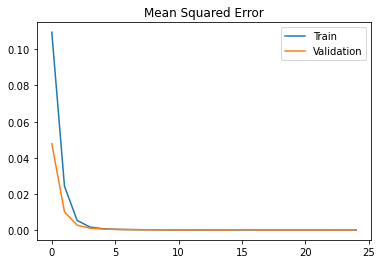

In [27]:
def visualising_data(hist):
    plt.title('Mean Squared Error')
    plt.plot(hist.history['mean_squared_error'], label='Train')
    plt.plot(hist.history['val_mean_squared_error'], label='Validation')
    plt.legend()
    plt.show()
visualising_data(history)

In [9]:
# shows weights of the ANN
# hypermodel.weights
hypermodel.summary()
# print(hypermodel.metrics_names)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 288)               12096     
_________________________________________________________________
dense_1 (Dense)              (None, 288)               83232     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                11560     
Total params: 106,888
Trainable params: 106,888
Non-trainable params: 0
_________________________________________________________________


In [10]:
# INSERT SOMETHING THAT CALCUALTES ALL MEAN SQUARED ERRORS AND PLOTS ON CDF GRAPH

In [11]:
# best_hps.__dict__.keys()
# best_hps.__dict__['values']
hypermodel.save('/Users/jackkelly/Desktop/Building_Model/Tuned_' + str(N_channels) + '_channels_ANN_model.h5')

# Transfer Learning

In [12]:
hypermodel = keras.models.load_model('Tuned_' + str(N_channels) + '_channels_ANN_model.h5')

In [13]:
hypermodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 288)               12096     
_________________________________________________________________
dense_1 (Dense)              (None, 288)               83232     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                11560     
Total params: 106,888
Trainable params: 106,888
Non-trainable params: 0
_________________________________________________________________


In [14]:
model = tf.keras.Sequential()
for layer in hypermodel.layers[:-1]: # go through until last layer
    layer.trainable=False
    model.add(layer)
model.add(keras.layers.Dense(40, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss=keras.losses.MeanSquaredError(), metrics=['mean_squared_error'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 288)               12096     
_________________________________________________________________
dense_1 (Dense)              (None, 288)               83232     
_________________________________________________________________
dense_3 (Dense)              (None, 40)                11560     
Total params: 106,888
Trainable params: 11,560
Non-trainable params: 95,328
_________________________________________________________________


In [15]:
N_channels = 40
file_path = '/Users/jackkelly/Desktop/Building_Model/Data/40_channels_data_variedlengths_10000.csv'
X_scale, Y_scale = processing_data(N_channels, file_path)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)
X_train, X_val, Y_train, Y_val = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.15)

In [16]:
start_time = time.time()
new_hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=40, shuffle=True, verbose=1, batch_size=N_channels+1)
training_time = time.time() - start_time

Train on 2550 samples, validate on 450 samples
Epoch 1/40
2550/2550 [==============================] - ETA: 25s - loss: 0.2407 - mean_squared_error: 0.240 - ETA: 0s - loss: 0.1863 - mean_squared_error: 0.186 - ETA: 0s - loss: 0.1550 - mean_squared_error: 0.15 - ETA: 0s - loss: 0.1310 - mean_squared_error: 0.13 - 1s 314us/sample - loss: 0.1276 - mean_squared_error: 0.1276 - val_loss: 0.0655 - val_mean_squared_error: 0.0655
Epoch 2/40
2550/2550 [==============================] - ETA: 0s - loss: 0.0650 - mean_squared_error: 0.06 - ETA: 0s - loss: 0.0511 - mean_squared_error: 0.05 - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.04 - ETA: 0s - loss: 0.0367 - mean_squared_error: 0.03 - 0s 95us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 3/40
2550/2550 [==============================] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.01 - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.01 - ETA: 0s - loss: 0.0143 - mean_squared_e

2550/2550 [==============================] - ETA: 0s - loss: 4.6298e-04 - mean_squared_error: 4.6298e- - ETA: 0s - loss: 4.0910e-04 - mean_squared_error: 4.0910e- - ETA: 0s - loss: 3.8551e-04 - mean_squared_error: 3.8551e- - ETA: 0s - loss: 3.8530e-04 - mean_squared_error: 3.8530e- - 0s 100us/sample - loss: 3.7931e-04 - mean_squared_error: 3.7931e-04 - val_loss: 3.9081e-04 - val_mean_squared_error: 3.9081e-04
Epoch 22/40
2550/2550 [==============================] - ETA: 0s - loss: 2.4777e-04 - mean_squared_error: 2.4777e- - ETA: 0s - loss: 3.6587e-04 - mean_squared_error: 3.6587e- - ETA: 0s - loss: 3.5240e-04 - mean_squared_error: 3.5240e- - ETA: 0s - loss: 3.5582e-04 - mean_squared_error: 3.5582e- - 0s 99us/sample - loss: 3.5806e-04 - mean_squared_error: 3.5806e-04 - val_loss: 3.6979e-04 - val_mean_squared_error: 3.6979e-04
Epoch 23/40
2550/2550 [==============================] - ETA: 0s - loss: 3.6791e-04 - mean_squared_error: 3.6791e- - ETA: 0s - loss: 3.7504e-04 - mean_squared_erro

2550/2550 [==============================] - ETA: 0s - loss: 1.1097e-04 - mean_squared_error: 1.1097e- - ETA: 0s - loss: 1.7063e-04 - mean_squared_error: 1.7063e- - ETA: 0s - loss: 1.7351e-04 - mean_squared_error: 1.7351e- - ETA: 0s - loss: 1.7265e-04 - mean_squared_error: 1.7265e- - 0s 103us/sample - loss: 1.7552e-04 - mean_squared_error: 1.7552e-04 - val_loss: 1.8244e-04 - val_mean_squared_error: 1.8244e-04


In [17]:
eval_result = model.evaluate(X_test, Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 1s 50us/sample - loss: 0.0011 - mean_squared_error: 8.9816e-04


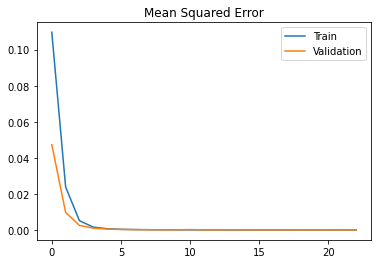

In [32]:
visualising_data(hypermodel_hist)

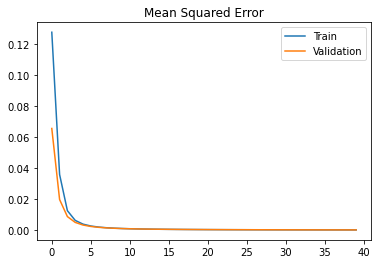

In [30]:
visualising_data(model.history)